<a href="https://colab.research.google.com/github/star-nox/churn_model/blob/main/churn_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

In [39]:
# reading data
data = pd.read_csv("Churn_Modelling.csv")

In [40]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [41]:
# checking for null values in the dataframe
data.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

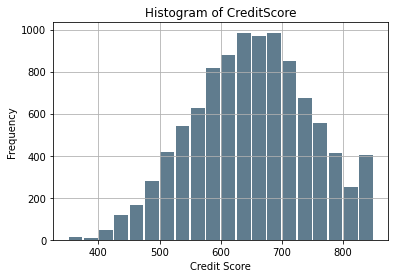

In [42]:
data['CreditScore'].plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e')
plt.title('Histogram of CreditScore')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

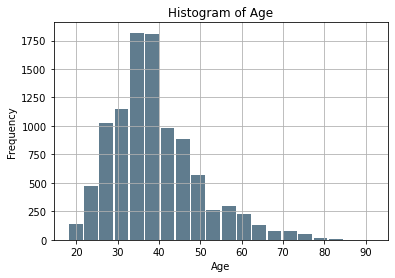

In [43]:
data['Age'].plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

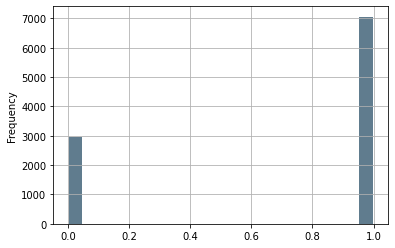

In [44]:
data['HasCrCard'].plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e')

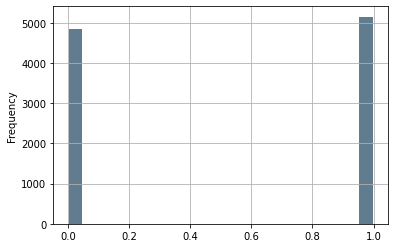

In [45]:
data['IsActiveMember'].plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e')

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
# converting string variables to numerical

labelencoder = LabelEncoder()
data['geography_num'] = labelencoder.fit_transform(data['Geography'])
data['gender_num'] = labelencoder.fit_transform(data['Gender'])

In [48]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,geography_num,gender_num
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,2,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,2,0


In [49]:
# dropping string variables and irrelevant variables

del data['Geography']
del data['Gender']
del data['Surname']
del data['CustomerId']
del data['RowNumber']

In [64]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,geography_num,gender_num
0,619,42,2,0.00,1,1,1,101348.88,0,0
1,608,41,1,83807.86,1,0,1,112542.58,2,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0
4,850,43,2,125510.82,1,1,1,79084.10,2,0


In [65]:
# separating predictor and response variables

Y = data[['Exited']]
X = data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 
          'EstimatedSalary', 'geography_num', 'gender_num']]

In [66]:
# splitting data into train and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [67]:
# scaling the predictor variables

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [68]:
# importing keras libraries

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, ReLU, ELU
from keras.layers import Dropout

In [69]:
# initializing ANN

classifier = Sequential()

classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 10))

classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu'))

classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [70]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 6)                 66        
                                                                 
 dense_6 (Dense)             (None, 6)                 42        
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


In [71]:
# fitting the ANN to the training dataset

nn_model = classifier.fit(x_train, y_train, validation_split = 0.2, batch_size = 10, epochs = 100)

Epoch 1/100
560/560 [==============================] - 2s 2ms/step - loss: 0.7027 - accuracy: 0.5779 - val_loss: 0.5584 - val_accuracy: 0.7971
Epoch 2/100
560/560 [==============================] - 1s 2ms/step - loss: 0.5288 - accuracy: 0.7962 - val_loss: 0.5114 - val_accuracy: 0.8000
Epoch 3/100
560/560 [==============================] - 1s 2ms/step - loss: 0.5035 - accuracy: 0.7971 - val_loss: 0.4957 - val_accuracy: 0.8000
Epoch 4/100
560/560 [==============================] - 1s 2ms/step - loss: 0.4903 - accuracy: 0.7971 - val_loss: 0.4843 - val_accuracy: 0.8000
Epoch 5/100
560/560 [==============================] - 1s 2ms/step - loss: 0.4799 - accuracy: 0.7971 - val_loss: 0.4759 - val_accuracy: 0.8000
Epoch 6/100
560/560 [==============================] - 1s 2ms/step - loss: 0.4716 - accuracy: 0.7973 - val_loss: 0.4685 - val_accuracy: 0.8000
Epoch 7/100
560/560 [==============================] - 1s 2ms/step - loss: 0.4642 - accuracy: 0.7975 - val_loss: 0.4616 - val_accuracy: 0.7993

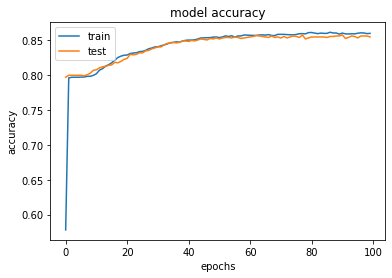

In [72]:
# visualizing accuracy

plt.plot(nn_model.history['accuracy'])
plt.plot(nn_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [73]:
# predictions on test dataset

y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

In [74]:
# creating the confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[2297,   82],
       [ 334,  287]])

In [75]:
# calculating accuracy

from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred)
score

0.8613333333333333